In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath("")))
from dependencies.constants import *

## plot helpers

In [44]:
def get_image_paths(df_row):
    export_folder = os.path.join(exports_folder, df_row["recording id"])
    image_paths = np.empty((4), dtype=object)
    for i, (camera_folder,index_name) in enumerate(zip(camera_folders, indices_names)):
        image_paths[i] = os.path.join(export_folder, camera_folder, str(df_row[index_name])+ ".png")
    return image_paths

def get_images(image_paths):
    images = []
    for image_path in image_paths:
        images.append(plt.imread(image_path))
    return images

## plot 10 random samples

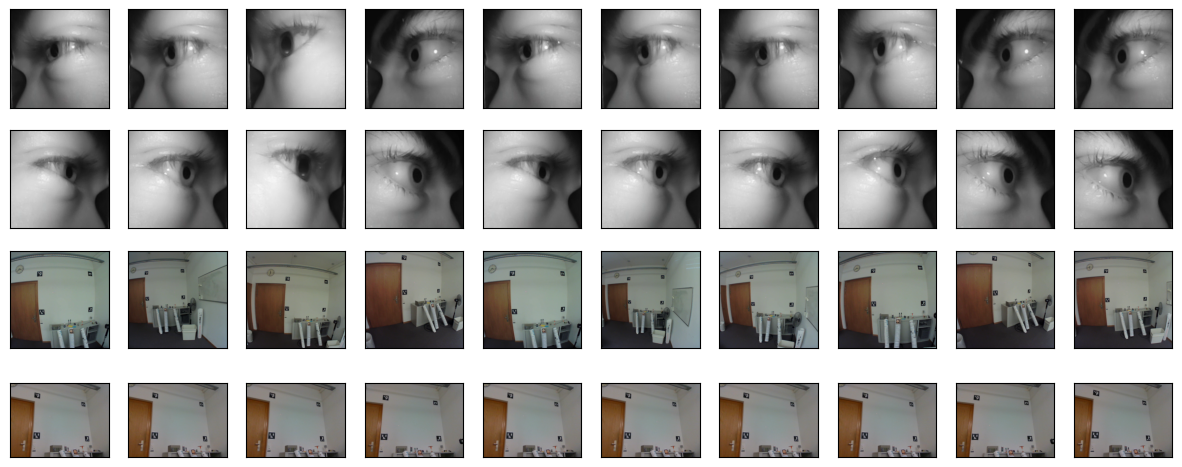

In [51]:

exports_df = pd.read_csv(os.path.join(exports_folder, "all_df.csv"))
#select 10 random rows
random_df = exports_df.sample(n=10)
#apply function to each row
image_paths = random_df.apply(lambda x: get_image_paths(x), axis=1)

#images is a list of lists of 4 images (one for each camera) for each row
images = []
for image_path in image_paths:
    images.append(get_images(image_path))

#plot images
fig, axes = plt.subplots(4, 10, figsize=(15, 6),
                            subplot_kw={'xticks': [], 'yticks': []})
#plot from top to bottom, left to right
for i in range(10):
    for j in range(4):
        #rotate left when j == 0 and rotate right when j == 1
        if j == 0:
            axes[j, i].imshow(np.rot90(images[i][j], k=1))
        elif j == 1:
            axes[j, i].imshow(np.rot90(images[i][j], k=1))
        else:
            axes[j, i].imshow(images[i][j])

plt.show()





